# Eluvio Data Science Coding Challenge

## The Data set consists of Worldwide news article wiith information of Date, Upvotes, Downvotes and author information

In [2]:
import pandas as pd
import requests
df = pd.read_csv("Eluvio_DS_Challenge.csv")
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,1/25/2008,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,1/25/2008,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,1/25/2008,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,1/25/2008,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,1/25/2008,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


## It is important to have an idea of what our data includes, methods like head(), describe(), dtypes() help us with that

In [3]:
df.columns

Index(['time_created', 'date_created', 'up_votes', 'down_votes', 'title',
       'over_18', 'author', 'category'],
      dtype='object')

In [4]:
df.shape

(509236, 8)

In [5]:
df.dtypes

time_created     int64
date_created    object
up_votes         int64
down_votes       int64
title           object
over_18           bool
author          object
category        object
dtype: object

In [6]:
df.describe()

,time_created,up_votes,down_votes
count,5.092360e+05,509236.000000,509236.0
mean,1.380240e+09,112.236283,0.0
std,7.090436e+07,541.694675,0.0
min,1.201232e+09,0.000000,0.0
25%,1.341585e+09,1.000000,0.0
50%,1.392909e+09,5.000000,0.0
75%,1.436527e+09,16.000000,0.0
max,1.479817e+09,21253.000000,0.0


In [7]:
df.describe(include=['object'])

,date_created,title,author,category
count,509236,509236,509236,509236
unique,3223,500713,85807,1
top,11/24/2015,#NAME?,davidreiss666,worldnews
freq,458,8,8897,509236


In [8]:
df["category"].unique()

array(['worldnews'], dtype=object)

In [9]:
df["down_votes"].unique()

array([0], dtype=int64)

### The "date" and "Time created" columns can be merged into 1 column and data type should be changed to "Datetime"

### Value of all rows for the column down votes is "0" so this column can be omitted, Category column has only 1 value for all the rows "worldnews" so this does not have any effect on other parameters so this column can also be omitted from the dataset

### Title and author columns can be coverted into string datatypes

### Boolean values in the "over 18" column can be converted into zeros and ones for simplicity

In [10]:
df["time_created"] = df["time_created"].apply(str)

df["title"].apply(str)
df["author"].apply(str)

df["over_18"] = df["over_18"].replace({False:0, True:1})

df["Date-time"]=df["date_created"]+df["time_created"]
df["Date-time"] = pd.to_datetime(df["Date-time"],format= "%m/%d/%Y%H%M%S%f")
df.drop(["time_created", "date_created", "category", "down_votes"], axis=1, inplace=True)
df.head()

,up_votes,title,over_18,author,Date-time
0,3,Scores killed in Pakistan clashes,0,polar,2008-01-25 12:01:23.204600
1,2,Japan resumes refuelling mission,0,polar,2008-01-25 12:01:23.207500
2,3,US presses Egypt on Gaza border,0,polar,2008-01-25 12:01:23.252300
3,1,Jump-start economy: Give health care to all,0,fadi420,2008-01-25 12:01:23.329000
4,4,Council of Europe bashes EU&UN terror blacklist,0,mhermans,2008-01-25 12:01:27.472000


In [11]:
df.head()

,up_votes,title,over_18,author,Date-time
0,3,Scores killed in Pakistan clashes,0,polar,2008-01-25 12:01:23.204600
1,2,Japan resumes refuelling mission,0,polar,2008-01-25 12:01:23.207500
2,3,US presses Egypt on Gaza border,0,polar,2008-01-25 12:01:23.252300
3,1,Jump-start economy: Give health care to all,0,fadi420,2008-01-25 12:01:23.329000
4,4,Council of Europe bashes EU&UN terror blacklist,0,mhermans,2008-01-25 12:01:27.472000


In [12]:
df.isnull().values.any()

False

### No missing information in the data 

### Using visualization to understand correlation between columns

### One hot encoding author column


In [13]:
#print (df.author.str.get_dummies())

In [14]:
from sklearn.preprocessing import LabelEncoder
df['author_encoded'] = LabelEncoder().fit_transform(df.author)
df.head()

,up_votes,title,over_18,author,Date-time,author_encoded
0,3,Scores killed in Pakistan clashes,0,polar,2008-01-25 12:01:23.204600,69284
1,2,Japan resumes refuelling mission,0,polar,2008-01-25 12:01:23.207500,69284
2,3,US presses Egypt on Gaza border,0,polar,2008-01-25 12:01:23.252300,69284
3,1,Jump-start economy: Give health care to all,0,fadi420,2008-01-25 12:01:23.329000,47856
4,4,Council of Europe bashes EU&UN terror blacklist,0,mhermans,2008-01-25 12:01:27.472000,62735


## Sentiment analysis of the titles


In [15]:
import nltk
#nltk.download('popular')
#nltk.download('vader_lexicon')
#nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

In [16]:
Title_sentiment = []

for i in df['title']:
    a = sentiment_analyzer.polarity_scores(i)
    if a["compound"]<0.05 and a["compound"]>-0.05:
        a=0 #Neutral
    elif a["compound"]>=0.05:
        a=1 #Positive
    elif a["compound"]<=0.05:
        a=-1 #Negative
    Title_sentiment.append(a)

df['Title_sentiment']=Title_sentiment

df.head()

,up_votes,title,over_18,author,Date-time,author_encoded,Title_sentiment
0,3,Scores killed in Pakistan clashes,0,polar,2008-01-25 12:01:23.204600,69284,-1
1,2,Japan resumes refuelling mission,0,polar,2008-01-25 12:01:23.207500,69284,0
2,3,US presses Egypt on Gaza border,0,polar,2008-01-25 12:01:23.252300,69284,0
3,1,Jump-start economy: Give health care to all,0,fadi420,2008-01-25 12:01:23.329000,47856,1
4,4,Council of Europe bashes EU&UN terror blacklist,0,mhermans,2008-01-25 12:01:27.472000,62735,-1


## Word clouds for the sentiment analysis

In [17]:
#!pip install wordcloud

In [21]:
from wordcloud import WordCloud

neg_string = []
pos_string = []
neu_string = []

#
neg_titles = df[df.Title_sentiment == -1]
#neg_titles['title']
for t in neg_titles.title:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
#
pos_titles = df[df.Title_sentiment == 1]
#pos_titles['title']
for t in pos_titles.title:
    pos_string.append(t)
pos_string = pd.Series(neg_string).str.cat(sep=' ')
#
neu_titles = df[df.Title_sentiment == 0]
#neu_titles['title']
for t in neu_titles.title:
    neu_string.append(t)
neu_string = pd.Series(neg_string).str.cat(sep=' ')

### Negative word cloud

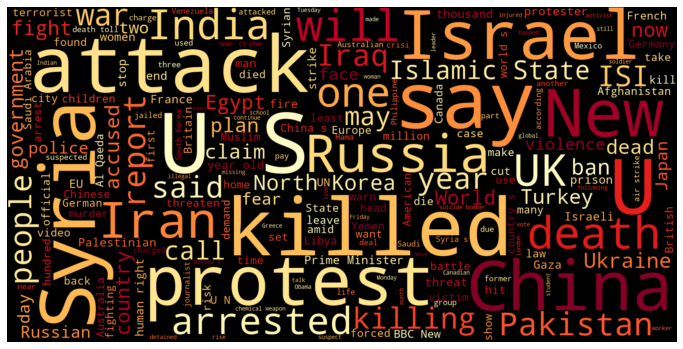

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='YlOrRd_r').generate(neg_string)
WordCloud()
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string) plt.figure(figsize=(12,10)) plt.imshow(wordcloud, interpolation="bilinear") plt.axis("off") plt.show()


### Positive word cloud

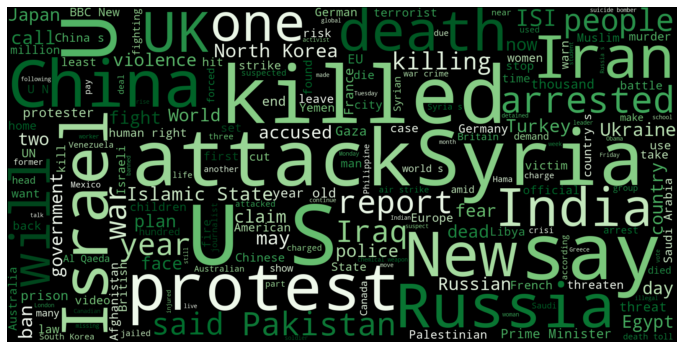

In [23]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='Greens').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Neutral word cloud

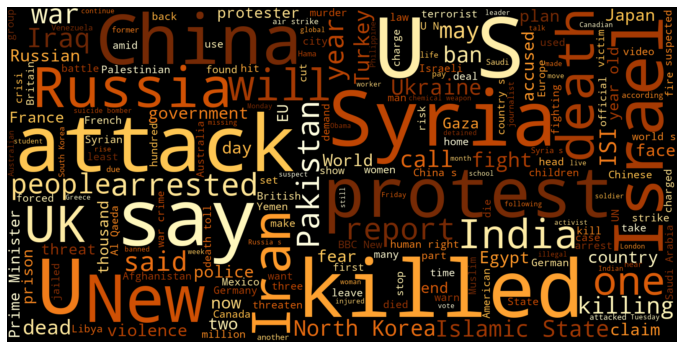

In [24]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='YlOrBr').generate(neu_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## ****The research Problem*****:



## Business Prospective: Let us assume a hypothetical scenario wherein a news organization has contacted me who is working as a free lance data scientist for analysis of their news article data and to provide business improvement ideas. Some sample questions to address this are as follows:

### 1. Who are the most popular authors and which news is getting more attention(Upvotes)
### 2. What is the impact of factors like sentiment of title, author and datetime on the reach of article
### 3. Possible suggestions on next articles


### Top 10 Articles, its authors and and sentiments

In [25]:
newdf=df[["title","up_votes","author","Title_sentiment"]]
newdf.sort_values('up_votes', ascending=False).head(10)

,title,up_votes,author,Title_sentiment
377200,A biotech startup has managed to 3-D print fak...,21253,KRISHNA53,-1
391415,Twitter has forced 30 websites that archive po...,13435,joeyoungblood,1
450818,2.6 terabyte leak of Panamanian shell company ...,13244,mister_geaux,-1
391318,The police officer who leaked the footage of t...,12333,navysealassulter,-1
390252,Paris shooting survivor suing French media for...,11288,seapiglet,1
449809,Hundreds of thousands of leaked emails reveal ...,11108,Xiroth,-1
397215,Brazil s Supreme Court has banned corporate co...,10922,DoremusJessup,1
390494,ISIS beheads 81-year-old pioneer archaeologist...,10515,DawgsOnTopUGA,-1
500786,Feeding cows seaweed could slash global greenh...,10394,mvea,-1
388230,Brazilian radio host famous for exposing corru...,10377,fiffers,-1


### top 10 Authors with most number of articles

In [26]:
newdf2=df[["author", "up_votes"]]
newdf2 = newdf2.pivot_table(index=['author'], aggfunc='count')
newdf2.sort_values('up_votes', ascending=False).head(10)

,up_votes
author,
davidreiss666,8897
anutensil,5730
DoremusJessup,5037
maxwellhill,4023
igeldard,4013
readerseven,3170
twolf1,2923
madam1,2658
nimobo,2564


### Top authors with highest avg upvotes

In [27]:
newdf5=df[['author', 'up_votes']]
newdf6 = newdf5.groupby(pd.Grouper(key='author')).mean()
newdf6.sort_values('up_votes', ascending=False).head(10)

,up_votes
author,
navysealassulter,12333.0
seapiglet,11288.0
DawgsOnTopUGA,10515.0
Flamo_the_Idiot_Boy,10289.0
haunted_cheesecake,9408.0
bendertheoffender22,8781.0
crippledrejex,8601.0
FlandersNed,8446.0
lesseva96,8404.0


### How number of articles posted changed over time and how upvotes to the articles changed over time

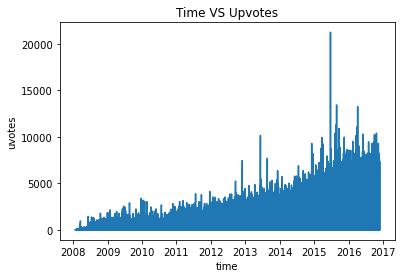

<AxesSubplot:xlabel='Date-time'>

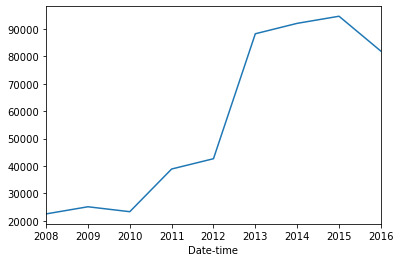

In [32]:
import matplotlib.pyplot as plt
  
# x axis values
x = df['Date-time']
# corresponding y axis values
y = df['up_votes']
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('time')
# naming the y axis
plt.ylabel('uvotes')
  
# giving a title to my graph
plt.title('Time VS Upvotes')
  
# function to show the plot
plt.show()
#df['count']=1
dg = df.groupby(pd.Grouper(key='Date-time', freq='1Y')).sum()

dg['count'].plot()


### One observation that can be made is, irrespective of content or authors the number of articles being posted and upvotes for these articles has increased exponentially. We can assume that this is due to increase in internet connectivity, availability of smart phones and development of social media wherein articles are shared

## news according to condition of over-18

In [33]:
newdf3=df[['over_18']]
newdf3.groupby(df['over_18']).count()

,over_18
over_18,
0,508916
1,320


### There are only 320 news articles out of more than 500 thousand articles so this parameter wont have a major impact on the overall data but It will provide us some insights 

### Following are the top 10 articles with over-18 conditions. They are news about violent crimes and most of them were detected to be negative sentiments 

In [34]:
newdf3 = df.loc[df['over_18'] == 1]
newdf3=newdf3[['title', 'up_votes', 'Title_sentiment']]
newdf6= newdf3.sort_values('up_votes', ascending=False).head(10)
newdf6['title']

500590    Judge presiding over  El Chapo s  case shot, k...
494536    [NSFL] Australian child molester Peter Scully ...
428689    Armed suspect shot dead after trying to storm ...
462067    Syria Army killed over 200 ISIS militants in 3...
303900                           Man escapes ISIS execution
461255    ISIS massacre 14 Real Madrid fans at supporter...
376435    The fight is on to stop an annual Chinese even...
269963    China: “Violent Government Thugs” Beaten To De...
431221    ISIS commits largest massacre since Syrian con...
246618    Video of riot police stripping detained protes...
Name: title, dtype: object

### We only have the title of the news article and not the actual article content. So we are assuming that if the title sentiment is negative, the news is negative

### With the available information, we cannot judge if a negative title contains negative article or it is just **clickbait**

### We can however check if negative articles got more upvotes than positive articles and decide if the title being negative or positve has any impact on the customer attention 

<AxesSubplot:xlabel='Title_sentiment'>

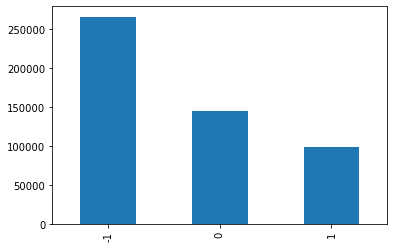

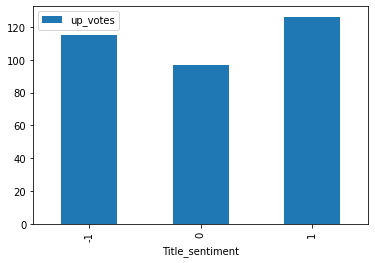

In [40]:
df['Title_sentiment'].value_counts().plot(x="Sentiment", y="Upvotes",kind="bar")
dg3 = df[['Title_sentiment','up_votes']]

dg3.groupby("Title_sentiment").mean().plot(kind="bar")

### Nearly 50% of all the news articles had negative title. 

### Positive titles were less than 50% in comparision to negative news

### However we we consider mean upvotes received based on sentiment category, positive news received more upvotes, thereby we can assume that these news received more attention

### Important business solution would be news agencies should try to have a positive title for the article to attract viewers. There is a beliefe that a negative news attracts more audience and some agencies try what is called as a click bait news. We do not have information on how many individuals viewed the article however if we assume the number is directly proportional to the upvotes, we can say for that the click bait news audience are very less

<ipython-input-41-8bdf0d74f67a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg4['Date-time'] = pd.to_datetime(dg4['Date-time'])


<AxesSubplot:xlabel='Date-time'>

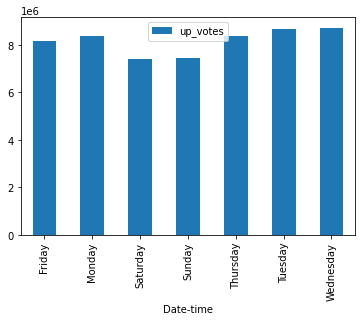

In [41]:
dg4=df[['Date-time', "up_votes"]]
dg4['Date-time'] = pd.to_datetime(dg4['Date-time'])

dg4.groupby(df['Date-time'].dt.day_name()).sum().plot(kind="bar")

### One assumption I made that articles released on weekends have more viewers. But with current data, it is proved to be wrong. More importantly news on weekends actually received less upvotes in comparision irrespective of the news.

### Wednesdays received maximum upvotes thereby maximum viewers

# Business observations: 

###  Follwing are the top 10 authors with most number of articles
Author           Upvotes
davidreiss666	 8897

anutensil	     5730

DoremusJessup	 5037

maxwellhill	     4023

igeldard	     4013

readerseven	     3170

twolf1	         2923

madam1	         2658

nimobo	         2564

madazzahatter	 2503



### Following are the top 10 authors with highest mean of upvotes taken into consideration

Author              Upvotes

navysealassulter	12333.0

seapiglet	        11288.0

DawgsOnTopUGA	    10515.0

Flamo_the_Idiot_Boy	10289.0

haunted_cheesecake	9408.0

bendertheoffender22	8781.0

crippledrejex	    8601.0

FlandersNed	        8446.0

lesseva96	        8404.0

sverdrupian	        8262.0


### Top articles:
A biotech startup has managed to 3-D print fake

Twitter has forced 30 websites that archive po...

2.6 terabyte leak of Panamanian shell company ...

The police officer who leaked the footage of t...

Paris shooting survivor suing French media for...

Hundreds of thousands of leaked emails reveal ...

Brazil s Supreme Court has banned corporate co...

ISIS beheads 81-year-old pioneer archaeologist...

Feeding cows seaweed could slash global greenh...

Brazilian radio host famous for exposing corru...


### Top over 18 titles:
Judge presiding over  El Chapo s  case shot, k...

[NSFL] Australian child molester Peter Scully ...

Armed suspect shot dead after trying to storm ...

Syria Army killed over 200 ISIS militants in 3...

Man escapes ISIS execution

ISIS massacre 14 Real Madrid fans at supporter...

The fight is on to stop an annual Chinese even...

China: “Violent Government Thugs” Beaten To De...

ISIS commits largest massacre since Syrian con...

Video of riot police stripping detained protes...



### Irrespective of content or authors the number of articles being posted and upvotes for these articles has increased exponentially. We can assume that this is due to increase in internet connectivity, availability of smart phones and development of social media wherein articles are shared

### There are only 320 news articles out of more than 500 thousand articles so this parameter wont have a major impact on the overall data but It will provide us some insights. Most of them were about violent crimes and received very few uvotes

### Nearly 50% of all the news articles had negative title. Positive titles were less than 50% in comparision to negative news. However we we consider mean upvotes received based on sentiment category, positive news received more upvotes, thereby we can assume that these news received more attention. 

### Day of the week had very small impact on the popularity of the article and weekends received lessed viewership to week days in comparision